In [1]:
import pandas as pd
import numpy as np

In [21]:
cols =["Diagnosis", "radius", "texture",
       "perimeter", "area", "smoothness",
       "compactness", "concavity", "concavePoints",
       "symmetry", "fractal dimension"]

dat = pd.read_csv("/Users/ben_cosgo/Downloads/wdbc.data", header=None, na_values = "none",
                  usecols = [1,22,23,24,25,26,27,28,29,30,31], names=cols)
dat

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concavePoints,symmetry,fractal dimension
0,M,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...
564,M,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
dat.corr()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concavePoints,symmetry,fractal dimension
radius,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
texture,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122
perimeter,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
area,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
smoothness,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624
compactness,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455
concavity,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511
concavePoints,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
symmetry,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848
fractal dimension,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000


In [49]:
import matplotlib.pyplot as plt

In [50]:
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

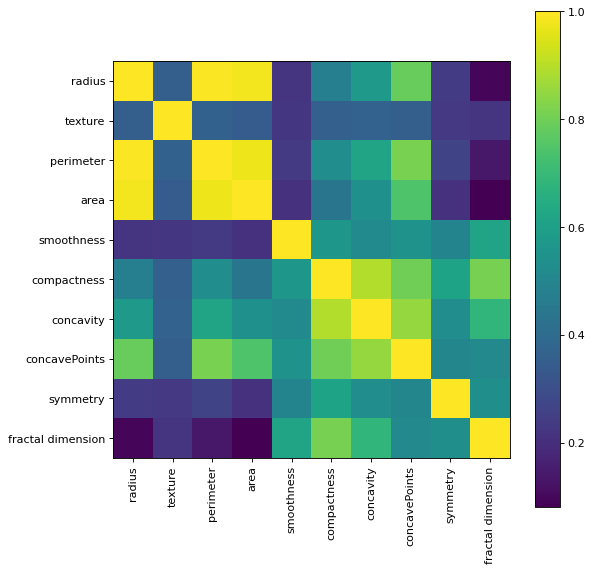

In [51]:
plotCorrelationMatrix(dat, 8)

We will need to drop 2 of the 3 options of area, radius, and perimeter. Additionally, we will likely need to drop 2 of the three options concavePoints, compactness, or concavity.

In [41]:
X=dat.drop(columns=['Diagnosis', 'perimeter','radius', 'fractal dimension',
                    'smoothness', 'concavePoints', 'compactness', 'texture'])
X

,area,concavity,symmetry
0,2019.0,0.7119,0.4601
1,1956.0,0.2416,0.2750
2,1709.0,0.4504,0.3613
3,567.7,0.6869,0.6638
4,1575.0,0.4000,0.2364
...,...,...,...
564,2027.0,0.4107,0.2060
565,1731.0,0.3215,0.2572
566,1124.0,0.3403,0.2218
567,1821.0,0.9387,0.4087


In [31]:
#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
from statsmodels.stats.outliers_influence import variance_inflation_factor   

In [42]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

     feature       VIF
0       area  4.457425
1  concavity  4.426045
2   symmetry  4.400901


In [52]:
data = X